## Exploratory Data Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs #For creating sample dataset
from sklearn.cluster import AgglomerativeClustering, KMeans

### Principles of Analytic Graphics

Refer to [this book](http://leanpub.com/exdata) for more info.

1. Show comparisions - Evidence for a hypothesis is always relative to another hypothesis, i.e., if we are going to compare any hyptothesis, let's say A, there is going to be an hypothesis B that we are going to compare it to. So whenever we describe our data or provide a summary, it is very important to ask what is the hypothesis compared to.
2. Show causality/mechanism/explanation/systematic structure - this means that how we beleive the world works and accordingly or how a system is operating. What is the causal framework for thinking about the question? This basically means that what we think the reason could be behind why the hypothesis is working the way it is working.
3. Show multivariate(more than 2 variable) data - Show as much data on a single plot as we can since the real world is multivariate. 
4. Integration of evidence - Completely integrate words, numbers, images, diagrams. Use as many modes of displaying evidence that we have. Do not be constraint by the tools to display evidence. For eg, if a tool only creates plots, do not just show plots in the summary. Do not let the tools drive the evidence. Should be able to combine different modes of evidence into a single presentation to make graphics or display as information rich as possible.
5. Descibe and document the evidence with appropriate scales, labels, sources, etc - This is so that the idea that we are presenting has some credibility since anyone can refer to these details and come up with the information. 
6. Content is King - If the story is not interesting, no amount of presentation can make it interesting. Having quality content or data to show is very important.

### Exploratory Graphs 

Exploratory graphs are graphs that we make for ourselves so that we can look at the data and explore what's going on in the data. We use graphs to - 
* Understand data properties
* Find patterns in data 
* Suggest modelling stratergies
* Debug analysis
* Communicate results

Characterestics of exploratory graphs - 
* They are made very quickly - made on fly while looking at data
* A large no of graphs are made to look at different aspects of data
* goal is to develop personal understanding of dataset and what are the properties of data 
* Get a sense of data 
* axes/legends are generally cleaned up later
* color/size are primarily used for information 

#### Simple summary of data

We first check the simple summary of data. This can be done in following ways - 
* Five number summary - This is basically like `describe()` function in pandas which tells breif summary of the data like the min value, median, max, mean, 1st quartile and 3rd quartile
* Boxplot
* Histogram - This provides some more detail. We can set the bins to make the histogram more granular(more number of bars)
* Density plot - A density plot is a smoothed, continuous version of a histogram estimated from the data

We can also have overlaying features. It basically means that we overlay some feature onto a plot. This allows us to get some more information from the plot.

We can do 2 dimension summaries using the following ways - 
* Multiple/overlayed 1-D plots
* Scatterplot
* Smooth Scatterplot

We can do multidimension(>2) summaries in the following ways - 
* Multiple/overlayed 2-D plots
* Using color/shape/size to add dimensions
* Spinning plots
* Actual 3-D plots

#### Exploratory analysis example

We will perform a simple exploratory analysis on Air Qaulity data(specific PM2.5 pollutant) data. We will use the following data - 
* Data source - https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
* Local path - "Learning/Data Science/data/aqiDaliy.csv"


In [3]:
# Loading the libbraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [67]:
# Reading the data
aqidaily = pd.read_csv('data/aqiDaliy.csv')

In [62]:
# Checking five number summary of the data 
aqidaily.describe()

,CBSA Code,AQI,Number of Sites Reporting
count,23358.000000,23358.000000,23358.000000
mean,30016.850758,32.220867,2.676342
std,11267.310752,16.554344,3.245695
min,10140.000000,0.000000,1.000000
25%,19860.000000,23.000000,1.000000
50%,29740.000000,34.000000,2.000000
75%,39820.000000,41.000000,3.000000
max,49740.000000,218.000000,33.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5faa053f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5faa05fa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5faa053990>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5faa064550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5faa040f50>],
 'means': []}

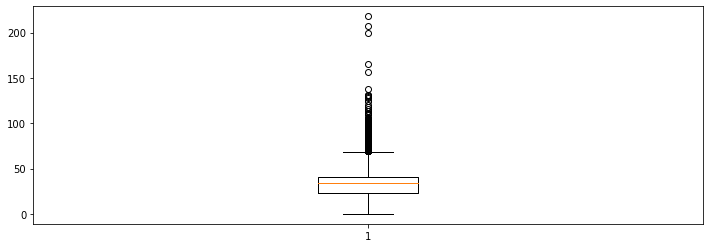

In [6]:
#Plotting Bar plot
plt.figure(figsize=(12, 4))

plt.boxplot(aqidaily['AQI'])

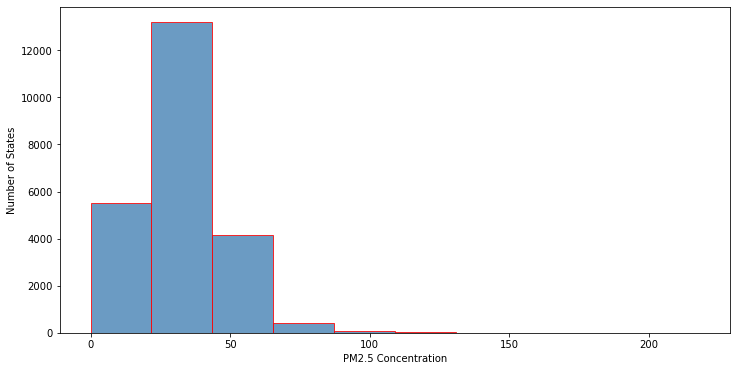

In [7]:
# Plotting histogram
plt.subplots(figsize=(12, 6))

plt.hist(aqidaily['AQI'], alpha=0.8, color='steelblue', edgecolor='red')

plt.xlabel('PM2.5 Concentration')
plt.ylabel('Number of States')

plt.show()


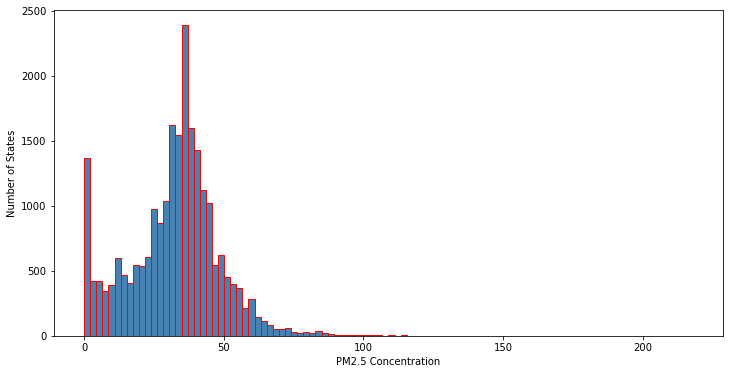

In [8]:
# Plotting histogram with higher bins
plt.subplots(figsize=(12, 6))

plt.hist(aqidaily['AQI'], bins = 100, color='steelblue', edgecolor='red')

plt.xlabel('PM2.5 Concentration')
plt.ylabel('Number of States')

plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5fa9d3b690>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5fa9d42150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5fa9d3b190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5fa9d42c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5fa9d7a590>],
 'means': []}

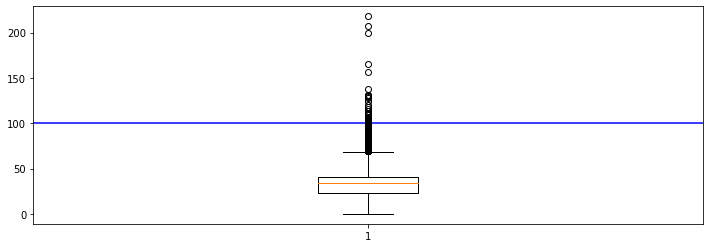

In [11]:
# Drawing a line in a boxplot(the line represent the permitted AQI level)
plt.figure(figsize=(12, 4))
plt.axhline(100, color="blue")
plt.boxplot(aqidaily['AQI'])

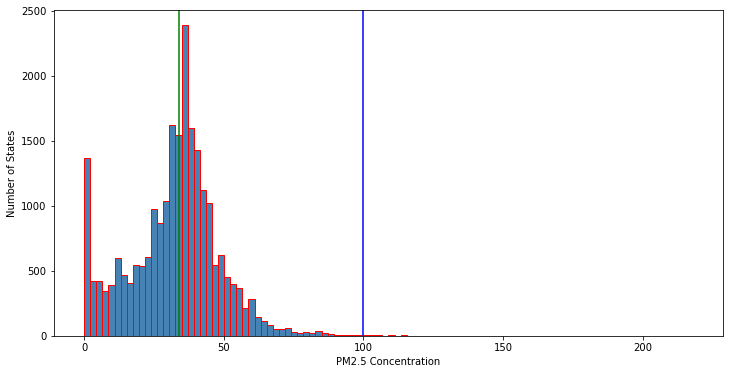

In [14]:
# Plotting histogram with higher bins with blue line representing the permitted AQI level & The green line representing the median
plt.subplots(figsize=(12, 6))

plt.hist(aqidaily['AQI'], bins = 100, color='steelblue', edgecolor='red')

plt.xlabel('PM2.5 Concentration')
plt.ylabel('Number of States')
plt.axvline(100, color="blue")
plt.axvline(aqidaily['AQI'].median(), color="green")
plt.show()


In [ ]:
# Bar plot

plt.figure(figsize=(12, 4))

barWidth = 1
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

In [ ]:
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

In [21]:
Y = np.random.rand(1, 5)[0]

In [22]:
Y

array([0.1134914 , 0.60147842, 0.67225864, 0.74844892, 0.57301466])

In [23]:
np.arange(len(Y))

array([0, 1, 2, 3, 4])

In [32]:
aqidaily['Category'].unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
       'Very Unhealthy', 'Unhealthy'], dtype=object)

In [33]:
aqidaily['Category'].unique().size

5

In [44]:
aqidaily.loc[aqidaily['Category'] == 'Good'].shape[0]

20882

In [36]:
aqidaily.describe()

,CBSA Code,AQI,Number of Sites Reporting
count,23358.000000,23358.000000,23358.000000
mean,30016.850758,32.220867,2.676342
std,11267.310752,16.554344,3.245695
min,10140.000000,0.000000,1.000000
25%,19860.000000,23.000000,1.000000
50%,29740.000000,34.000000,2.000000
75%,39820.000000,41.000000,3.000000
max,49740.000000,218.000000,33.000000


In [68]:
data = aqidaily['Category'].unique()
data.sort()
data

array(['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups',
       'Very Unhealthy'], dtype=object)

In [53]:
aqidaily['Category'].value_counts()

Good                              20882
Moderate                           2431
Unhealthy for Sensitive Groups       40
Unhealthy                             3
Very Unhealthy                        2
Name: Category, dtype: int64

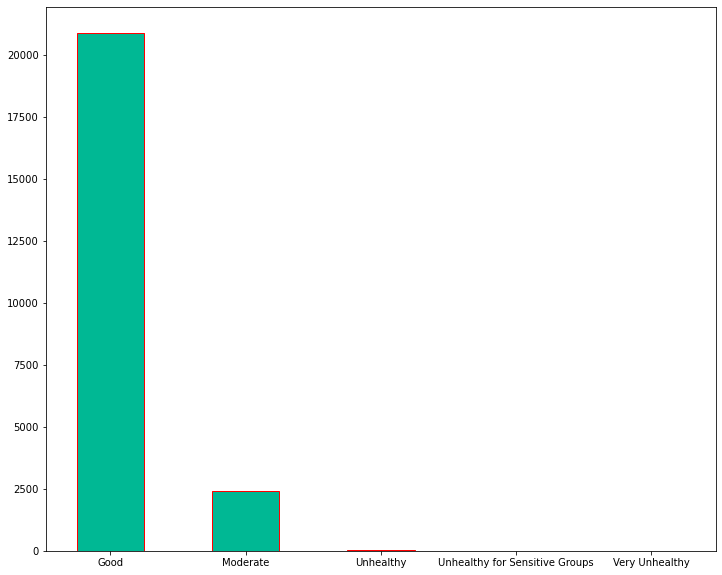

In [69]:
# Bar plot to plot the count of cities with particular air quality type

plt.figure(figsize=(12, 10))

barWidth = 0.5
plt.bar(data, aqidaily['Category'].value_counts(), width=barWidth, color='#00b894', edgecolor='Red')

plt.show()

### Hierarchial clustering(cluster analysis)

It is used to visualize multi dimensional dataset. Clustering techniques organize things that are close into groups. To perform clustering, we need to answer the following questions - 
* How to define **close** things
* How to group things together
* How to visualize the grouping
* How to interpret the grouping

Hierarchial clustering involves organizing the data in hierarchy. A common approach for it is __agglomerative__ approach which is a top down approach and involves lumping the data together until the data is a single cluster. For this, we need to find 2 closest points in data and create a new point(hypothetical point not a real dataset point) which is merger of the 2 closest points and remove the original 2 data points. We keep on repeating the process. After combining the data, we get kind of a tree structure(called **dendogram**) which contains information on how we combined the points. This approach requires 2 things - 
* distance metric - how to calculate distance b/w 2 points
* how to merge points(approach)

One of the most imp part in this process is defining distance metric, i.e., how to define the distance between 2 points. There are several ways to do so. If we do not choose a way which does not make sense for a specific dataset, then the clustering might just product some garbage data. Some of the distance metric are - 
* Euclidean(continuous) - 
<div>
    <img src="images/data_science-euclidean_distance.png" width=40%/>
</div>
This is the displacement distance between 2 points. It is calculated as the square root of the sum of the squares of the differences in values of the various dimensional values of the data point.

* Mahatten(Binary) distance 
<div>
    <img src="images/data_science-manhatten_distance.png" width=40%/>
</div>
    This is the actual travellable distance between 2/ points. If we imagine the system as a grid and we can traverse on the grid instead of directly connecting 2 points, then the manhatten distance is the sum of the absolute values of differences of all the points

* Correlation(continuous) similarity 

#### How Hierarchial clustering works

To perform hierarchial clustering, we perform the following steps - 
1. Calculate the distance between all the points - First we need to calculate the distance between all the points we have in the data set. The distance can be calculated using any of the distance metrics as defined above. Once we calculate the distance between all the points, we store it in a matrix called the distance matrix. This is a lower triangle matrix containing the distance between each point w.r.t each other. 
2. Combining the closest 2 points - Pick the 2 closest points from the distance matrix and combine them, meaning, create a new imaginary point which is in the mid of the 2 points and remove them from the data set. 
3. Continue performing this until there is only a single point remaining after merging the closest points. The order in which the points are merged will be stored in a tree structure called **cluster dendogram**.

#### Dividing into clusters

Once the clustering process is completed and we have a single point, we can create a dendogram to see where how the points have been combined and how we can define clusters. A dendogram looks something like this - 
<div>
    <center>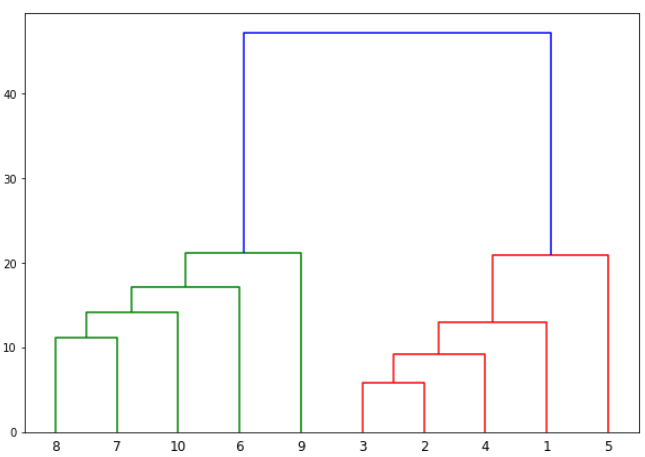</center>
</div>


Now in this dendogram, we see which are the longest vertical lines and we create a __cut__ at that point,i.e., basically defining how many clusters will be there and which data points belong to which cluster.
<div>
    <center>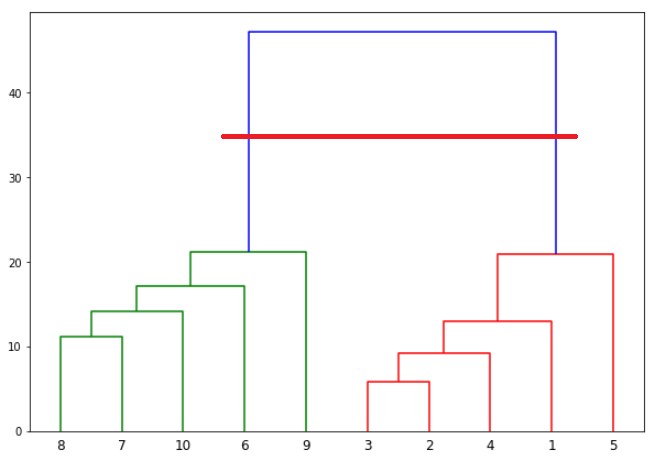</center>
</div>

The __red__ horizontal line cutting the dendogram divides the tree into 2 branches, so the final result will have 2 clusters and the points which form each branch will belong to the respective clusters

#### Merging points 

Once the clusters have been formed, we can calculate the distance between 2 cluters using 1 of the following methods - 
* Average linkage - In this, we calculate the distance between the clusters by taking the average of the coordinate valus for all the points in the respective clusters and calculating the distance between the average coordinate points
* Complete linkage - In this, we calculate the distance between 2 clusters by calculating the distance between 2 farthest points in the each of the cluster.

Both of the methods retuurn different values and are used based on requirements. Sometimes both methods can also be used.

#### Implementing hierarchial clustering

In python, we can implement hierarchial clustering using the `scikit` package.

In [8]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

X

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 30],
       [85, 70],
       [71, 80],
       [60, 78],
       [70, 55],
       [80, 91]])

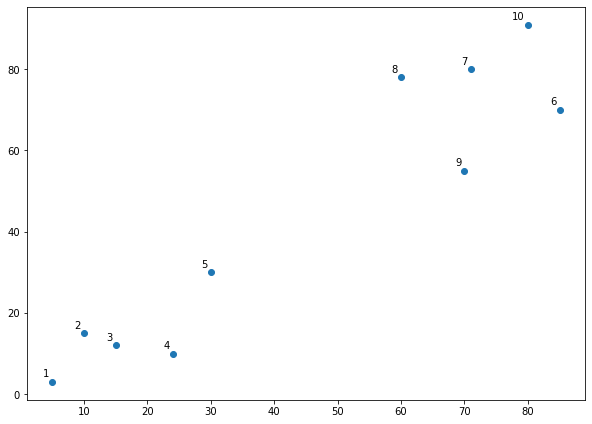

In [9]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

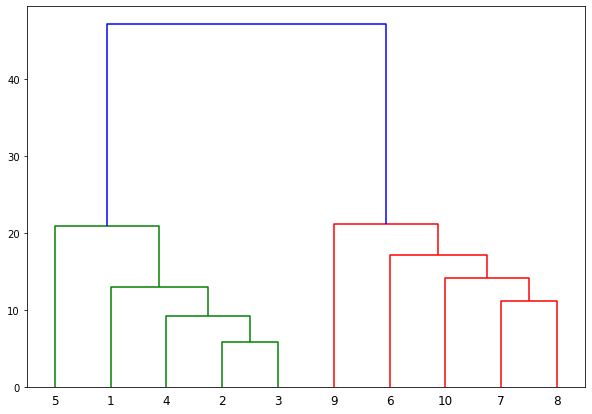

In [10]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [11]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

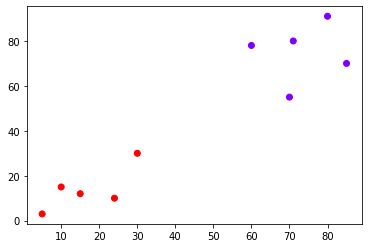

In [12]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')


### K-means clustering

K-means clustering is another type of clustering analysis that we can perform on the data, similar to hierarchial clustering. In K-means clustering, we need to define the number of clusters beforehand. This is different from hierarchial clustering in which we identify the number of clusters formed after creating distance matrix. The K-means clustering works as follows - 
1. Defining number of clusters - Firstly we need to define the number of clusters that we want to have in the data. This will be a fixed value during analysis. 
2. Get __centroids__ of the clusters - Once the clusters are defined, we define the centroids for all the clusters. Generally while starting, we just take 'n' random points in the dataset as cluster centroids, where 'n' is the number of clusters.
3. Assigning points to the closest centroids - Once the cluster centroids are defined, we start assigning each point to the closest cluster centroid. The distance can be calculated using euclidean, manhatten or correlation distance metric.
4. Recalculating centroids - Once all the points are assigned to the centroids, we recalculate the centroid position. The new position is the mean of position of all the values belonging to that centroid.

So the following things that we require before starting the clustering is - 
* number of clusters
* initial centroid points
* distance metric to be used to calculate distance between points and centroids

Once the analaysis is completed, we have the following data - 
* position of each centroid
* data of which points belongs to which cluster

#### Elbow method
We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method). WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.

#### Implementing K-means clustering

As we saw above, to implement K-means, first we need to select the number of clusters that we want to create. For this, we can either pick up an arbitrary number of clusters or we can use a technique called `elbow` method. The elbow method is used to get an estimate of how many clusters should the data have. 

\begin{equation*}
WSS = \sum_{i=1}^n (x_i - c_i)^2 
\end{equation*}

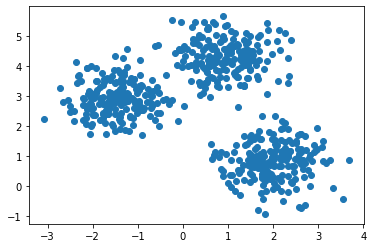

In [16]:
X, y = make_blobs(n_samples=600, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

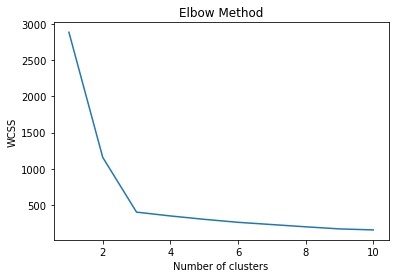

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

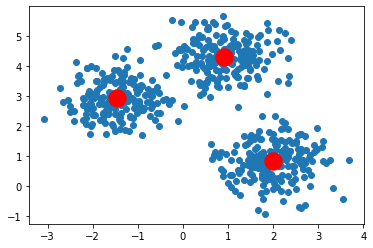

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Data Reduction

Generally when we perform analysis on the data, the data has generally lots and lots of different variables, some of which are independent and some of which might be correlated to each other. The goal in data reduction is - 

1. find a new set of multivariate variables which are uncorrelated(unrelated) and explain as much variance as possible. This means that we use the variable combination that are having no relation with each other and still be able to explain all the information that we could with having the relation variables. This can be achieved by using a technique called **Principal Component Analysis(PCA)**(This fulfills **Statistical** need)
2. create a new set of data that contians fewer variables that the original data but is still having information same as the original data, i.e., the new dataset can be provide all the information that the original data provides. This can be achieved by using a technique called **Singluar Value Decomposition(SVD)**(This fulfills **Data Compression** need)

#### Singular Value Decomposition

If `X` is a matrix with each variable in a column and each observation in a row then the SVD is a
"matrix decomposition"
\begin{equation*}
X = UDV^T 
\end{equation*}
where the columns of `U` are orthogonal (left singular vectors), the columns of `V` are orthogonal (right
singular vectors) and `D` is a diagonal matrix (singular values).

To perform SVD in Python, we need to import the `svd` method from the `scipy.linalg` library.

In [1]:
# Singular-value decomposition
from numpy import array
from scipy.linalg import svd

# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


#### Principal Component Analysis(PCA)

If the original matrix is `X` which has some columns as variables and rows as observation, then in **PCA**, we will subtract the column mean from each column, then divide the column data by the standard deviation of the column. Once we get the new normalized matrix, we perform SVD on that. The right singular matrix or `V` matrix of the SVD gives us the PCA.

The principal components are equal to the right singular values if you first scale (subtract the mean,
divide by the standard deviation) the variables.

To perform PCA in Python, we will use the `PCA` function in `sklearn.decomposition` library

**Note - This can be done using `sklearn.decomposition`, need to learn that**

In [ ]:
from numpy import array, dot, mean, std, empty, argsort
from numpy.linalg import eigh, solve
from numpy.random import randn
from matplotlib.pyplot import subplots, show

def cov(X):
    """
    Covariance matrix
    note: specifically for mean-centered data
    note: numpy's `cov` uses N-1 as normalization
    """
    return dot(X.T, X) / X.shape[0]

def pca(data, pc_count = None):
    """
    Principal component analysis using eigenvalues
    note: this mean-centers and auto-scales the data (in-place)
    """
    data -= mean(data, 0)
    data /= std(data, 0)
    C = cov(data)
    E, V = eigh(C)
    key = argsort(E)[::-1][:pc_count]
    E, V = E[key], V[:, key]
    U = dot(data, V)  # used to be dot(V.T, data.T).T
    return U, E, V

""" test data """
data = array([randn(8) for k in range(150)])
data[:50, 2:4] += 5
data[50:, 2:5] += 5

""" visualize """
trans = pca(data, 3)[0]
fig, (ax1, ax2) = subplots(1, 2)
ax1.scatter(data[:50, 0], data[:50, 1], c = 'r')
ax1.scatter(data[50:, 0], data[50:, 1], c = 'b')
ax2.scatter(trans[:50, 0], trans[:50, 1], c = 'r')
ax2.scatter(trans[50:, 0], trans[50:, 1], c = 'b')
show()

### PM2 Data analysis

After understaning about exploratory data analysis and its components, we will perform the learnings on PM2.5 data. 

PM2.5 is basically small particulate matter in the air. We will be performing data analysis on PM2.5 data of USA in year 1999 and 2012 and try to understand whether it has decreased, increased or remained same in USA and see the patterns on a high level. We will use the PM2.5 data set available on the [EPA website](https://www.epa.gov/aqs). The data set used is the daily air quality analysis for year 1999 and 2012 present in folder `data/pm25_data`.

First we will take a look at the data set to get an idea about how it is structured.

In [1]:
dataset = open('data/pm25_data/RD_501_88101_1999-0.txt')
for i in range(0,7):
    print(dataset.readline())

dataset.close()

# RD|Action Code|State Code|County Code|Site ID|Parameter|POC|Sample Duration|Unit|Method|Date|Start Time|Sample Value|Null Data Code|Sampling Frequency|Monitor Protocol (MP) ID|Qualifier - 1|Qualifier - 2|Qualifier - 3|Qualifier - 4|Qualifier - 5|Qualifier - 6|Qualifier - 7|Qualifier - 8|Qualifier - 9|Qualifier - 10|Alternate Method Detectable Limit|Uncertainty

# RC|Action Code|State Code|County Code|Site ID|Parameter|POC|Unit|Method|Year|Period|Number of Samples|Composite Type|Sample Value|Monitor Protocol (MP) ID|Qualifier - 1|Qualifier - 2|Qualifier - 3|Qualifier - 4|Qualifier - 5|Qualifier - 6|Qualifier - 7|Qualifier - 8|Qualifier - 9|Qualifier - 10|Alternate Method Detectable Limit|Uncertainty

RD|I|01|027|0001|88101|1|7|105|120|19990103|00:00||AS|3|||||||||||||

RD|I|01|027|0001|88101|1|7|105|120|19990106|00:00||AS|3|||||||||||||

RD|I|01|027|0001|88101|1|7|105|120|19990109|00:00||AS|3|||||||||||||

RD|I|01|027|0001|88101|1|7|105|120|19990112|00:00|8.841||3|||||||||||||

RD|I|0

Looking at the dataset, we see that we have 1st 2 lines as kind of headers. The first value in header `RD` and `RC` are for different kind of datasets. Since we do not have any `RC` values in the dataset, we can ignore those. Then we have different rows with values separated by `|` and many empty values.

We will now load this data using `pandas.read_csv` function.

In [2]:
import pandas as pd

pm0 = pd.read_csv(
    'data/pm25_data/RD_501_88101_1999-0.txt',
    sep='|', # Since the column values in rows are separated by '|', we use that as data separator
    comment = '#', # This will not read the lines starting with '#' which is there in our data set
    parse_dates = [10], # Since the 10th column(starting counting from 0) contains date, we parse it as date using parse_date function of read_csv
    header=None) # Since we do not want to load the headers from the data set, we set header=None

pm0

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117416,RD,I,78,10,12,88101,1,7,105,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117417,RD,I,78,10,12,88101,1,7,105,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117418,RD,I,78,10,12,88101,1,7,105,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117419,RD,I,78,10,12,88101,1,7,105,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We did not load the column name as headers since we will perform some operations on then and then add them to the dataframe object.

We will check some of basic data about the dataset like shape, head, info and summary

In [3]:
pm0.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pm0.shape

(117421, 28)

In [5]:
pm0.info

<bound method DataFrame.info of         0  1   2   3   4      5   6   7    8    9   ...  18  19  20  21  22  \
0       RD  I   1  27   1  88101   1   7  105  120  ... NaN NaN NaN NaN NaN   
1       RD  I   1  27   1  88101   1   7  105  120  ... NaN NaN NaN NaN NaN   
2       RD  I   1  27   1  88101   1   7  105  120  ... NaN NaN NaN NaN NaN   
3       RD  I   1  27   1  88101   1   7  105  120  ... NaN NaN NaN NaN NaN   
4       RD  I   1  27   1  88101   1   7  105  120  ... NaN NaN NaN NaN NaN   
...     .. ..  ..  ..  ..    ...  ..  ..  ...  ...  ...  ..  ..  ..  ..  ..   
117416  RD  I  78  10  12  88101   1   7  105  116  ... NaN NaN NaN NaN NaN   
117417  RD  I  78  10  12  88101   1   7  105  116  ... NaN NaN NaN NaN NaN   
117418  RD  I  78  10  12  88101   1   7  105  116  ... NaN NaN NaN NaN NaN   
117419  RD  I  78  10  12  88101   1   7  105  116  ... NaN NaN NaN NaN NaN   
117420  RD  I  78  10  12  88101   1   7  105  116  ... NaN NaN NaN NaN NaN   

        23  24  25 

Now we will read the headers and modify it so that we can use it in our dataset. Since the header name has spaces in that, we will replace the spaces with `.` to make it easy to work on.

In [6]:
dataset = open('data/pm25_data/RD_501_88101_1999-0.txt')

header = dataset.readline()
dataset.close()
header = header.split(sep = '|')
print(header)
pm0.columns = header
pm0.columns = pm0.columns.str.replace(pat = ' ', repl = '.')
pm0

['# RD', 'Action Code', 'State Code', 'County Code', 'Site ID', 'Parameter', 'POC', 'Sample Duration', 'Unit', 'Method', 'Date', 'Start Time', 'Sample Value', 'Null Data Code', 'Sampling Frequency', 'Monitor Protocol (MP) ID', 'Qualifier - 1', 'Qualifier - 2', 'Qualifier - 3', 'Qualifier - 4', 'Qualifier - 5', 'Qualifier - 6', 'Qualifier - 7', 'Qualifier - 8', 'Qualifier - 9', 'Qualifier - 10', 'Alternate Method Detectable Limit', 'Uncertainty\n']


,#.RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,...,Qualifier.-.3,Qualifier.-.4,Qualifier.-.5,Qualifier.-.6,Qualifier.-.7,Qualifier.-.8,Qualifier.-.9,Qualifier.-.10,Alternate.Method.Detectable.Limit,Uncertainty\n
0,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RD,I,1,27,1,88101,1,7,105,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117416,RD,I,78,10,12,88101,1,7,105,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117417,RD,I,78,10,12,88101,1,7,105,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117418,RD,I,78,10,12,88101,1,7,105,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117419,RD,I,78,10,12,88101,1,7,105,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will read the PM2.5 value from the dataset. It is under the column `Sample.Value` and get summary abot the data.

In [7]:
pm0['Sample.Value'].describe()

count    104204.000000
mean         13.738101
std           9.409935
min           0.000000
25%           7.200000
50%          11.500000
75%          17.900000
max         157.100000
Name: Sample.Value, dtype: float64

Since there are some missing values in the dataset, lets check what % of values are null

In [8]:
pm0.loc[pm0['Sample.Value'].isnull(), ['Sample.Value']].shape[0] * 100 / pm0.shape[0]

11.256078554943324

So we have arounf `11%` values as null which is a big number. Now we can either let these values be or perform some null value operations depending on our need and dataset.

Now let's read our 2012 dataset and perform similar operations to get the data.

In [9]:
import pandas as pd

pm1 = pd.read_csv(
    'data/pm25_data/RD_501_88101_2012-0.txt',
    sep='|', # Since the column values in rows are separated by '|', we use that as data separator
    comment = '#', # This will not read the lines starting with '#' which is there in our data set
    parse_dates = [10], # Since the 10th column(starting counting from 0) contains date, we parse it as date using parse_date function of read_csv
    header=None) # Since we do not want to load the headers from the data set, we set header=None

dataset = open('data/pm25_data/RD_501_88101_2012-0.txt')

header = dataset.readline()
dataset.close()
header = header.split(sep = '|')
print(header)
pm1.columns = header
pm1.columns = pm1.columns.str.replace(pat = ' ', repl = '.')
pm1

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['# RD', 'Action Code', 'State Code', 'County Code', 'Site ID', 'Parameter', 'POC', 'Sample Duration', 'Unit', 'Method', 'Date', 'Start Time', 'Sample Value', 'Null Data Code', 'Sampling Frequency', 'Monitor Protocol (MP) ID', 'Qualifier - 1', 'Qualifier - 2', 'Qualifier - 3', 'Qualifier - 4', 'Qualifier - 5', 'Qualifier - 6', 'Qualifier - 7', 'Qualifier - 8', 'Qualifier - 9', 'Qualifier - 10', 'Alternate Method Detectable Limit', 'Uncertainty\n']


,#.RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,...,Qualifier.-.3,Qualifier.-.4,Qualifier.-.5,Qualifier.-.6,Qualifier.-.7,Qualifier.-.8,Qualifier.-.9,Qualifier.-.10,Alternate.Method.Detectable.Limit,Uncertainty\n
0,RD,I,1,3,10,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RD,I,1,3,10,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RD,I,1,3,10,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RD,I,1,3,10,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RD,I,1,3,10,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304282,RD,I,72,127,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304283,RD,I,72,127,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304284,RD,I,72,127,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304285,RD,I,72,127,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pm1['Sample.Value'].describe()

count    1.231154e+06
mean     9.139924e+00
std      8.556330e+00
min     -1.000000e+01
25%      4.000000e+00
50%      7.633330e+00
75%      1.200000e+01
max      9.089700e+02
Name: Sample.Value, dtype: float64

In [11]:
pm1.loc[pm1['Sample.Value'].isnull(), ['Sample.Value']].shape[0] * 100 / pm1.shape[0]

5.607124812253745

Again since the data has around `5%` of null values, we need to decide what to do with those values depending on our needs and the dataset.

In [12]:
pm0['Sample.Value'].describe()

count    104204.000000
mean         13.738101
std           9.409935
min           0.000000
25%           7.200000
50%          11.500000
75%          17.900000
max         157.100000
Name: Sample.Value, dtype: float64

In [13]:
pm1['Sample.Value'].describe()

count    1.231154e+06
mean     9.139924e+00
std      8.556330e+00
min     -1.000000e+01
25%      4.000000e+00
50%      7.633330e+00
75%      1.200000e+01
max      9.089700e+02
Name: Sample.Value, dtype: float64

Looking at the data above, we see that on average, the PM2.5 values have gone down(see `mean`) although there are more extreme high end in 2012.

To get some more understanding about the PM2.5 values in 1999 and 2012, we can plot a boxplot for both side by side to compare. Since the boxplot does not gracefully handle the null values present in dataset, we will drop the rows which have `Sample.Value` as null and then use those.

In [14]:
pm0 = pm0[pm0['Sample.Value'].notna()]
pm1 = pm1[pm1['Sample.Value'].notna()]

In [15]:
import matplotlib.pyplot as plt
import numpy as np

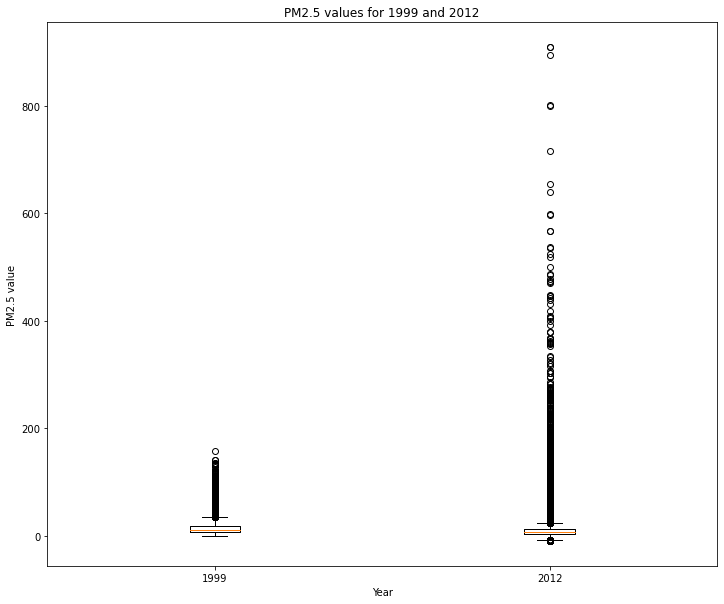

In [16]:
fig, ax = plt.subplots(figsize=(12,10))

ax.set_title('PM2.5 values for 1999 and 2012')
ax.set_xlabel('Year')
ax.set_ylabel('PM2.5 value')
ax.boxplot([pm0['Sample.Value'], pm1['Sample.Value']], labels = ['1999','2012'])


fig.show()

The above plot shows that although the mean PM2.5 value has gone down slightly and there are more outliers, since the scale of both values are so varied that the plot is not proportinate. 

To handle this, instead of plotting directly the values, we can plot the `log10` values. This will help in scaling down the `Sample.Value` values and help in seeing thr plot clearly. We can get `log10` values using numpy function `np.log10`.

Since there are negative values in our dataset for 2012(which is not possible since particulate can be minimum 0 and might have happened due to incorrect value recording or measurement), when we take the `log10` of those values, we will get `na` in response which is not handled gracefully by `boxplot`. So we will use the function `.dropna()` to drop all the `na` values before plotting the boxplot.

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


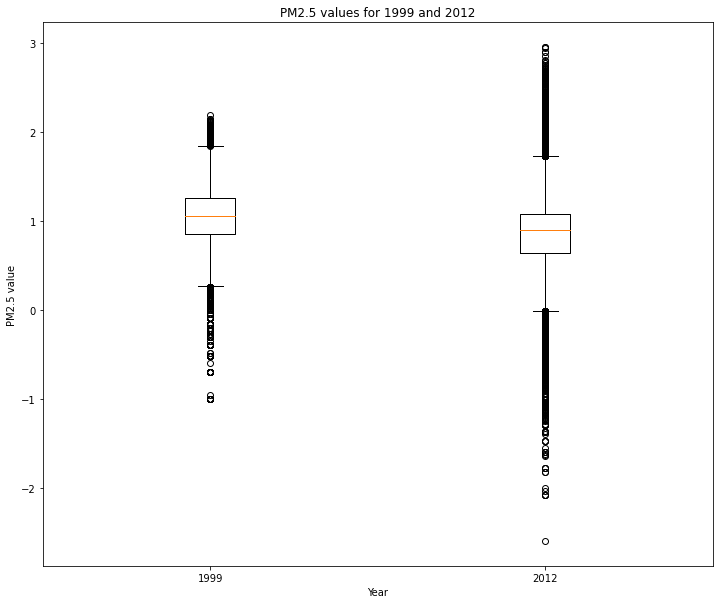

In [17]:
fig, ax = plt.subplots(figsize=(12,10))

ax.set_title('PM2.5 values for 1999 and 2012')
ax.set_xlabel('Year')
ax.set_ylabel('PM2.5 value')
ax.boxplot([np.log10(pm0['Sample.Value']).dropna(), np.log10(pm1['Sample.Value']).dropna()], labels = ['1999','2012'])


fig.show()

We can see that although the mean has gone down from 1999 to 2012, there are more outlier values or more spread of PM2.5 values in 2012 compared to 1999.

In our 2012 dataset, there are multiple values which are negative. We can check how many values are negative as well as when these negative values were measured.

In [18]:
pm1[pm1['Sample.Value'] < 0].shape[0]

26474

We see that there are `26474` negative values in the dataset. Let's check when these values were measured. The date of measurement is present in `Date` column. To do this, we can plot an histogram which gives the total measurements in each month. We will plot both total measurements and only negative measurements.

In [19]:
pm1['Date']

0         2012-01-01
1         2012-01-04
2         2012-01-07
3         2012-01-10
4         2012-01-13
             ...    
1304282   2012-06-17
1304283   2012-06-20
1304284   2012-06-23
1304285   2012-06-26
1304286   2012-06-29
Name: Date, Length: 1231154, dtype: datetime64[ns]

In [20]:
pm1[['Sample.Value', 'Date']].groupby(pm1['Date'].dt.strftime('%m'))['Sample.Value'].count()

Date
01    180083
02    166941
03    181092
04    164524
05    170505
06    158772
07    102022
08     71541
09     35596
10        78
Name: Sample.Value, dtype: int64

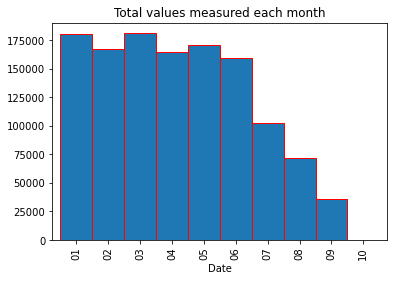

In [21]:
# Since the date column contains data by date, we need to group the sample values by month and basically count how many measurements were there in each month

# If we have a very big expression and we want to break it into multiline(for easy understanding), we can do so by basiclly enveloping the complete function in ()
(
    pm1[['Sample.Value', 'Date']] # We only require the Sample.Value and Date column values so we select that
     # Since we want to group all the Sample.Value according to month in Date column, we can use the groupby function of pandas.
    # The groupby function takes as input the parameter by which we want to group the data and which data to group.
    # Since we want to group the data by month, we pass the Date column. To extract the month field, we use dt.strftime('%m'). 
    .groupby(pm1['Date'].dt.strftime('%m'))['Sample.Value'] 
    # then we pass the column(s) which we want to group in ['column name'] as well as the stratergy. We are using .count() since we want to count the number of Sample.Value in each month. We can use other stratergies like sum, etc
    .count()
    # Finally we are plotting the barplot for this data
    .plot(kind='bar', width=1, edgecolor = 'red', title = 'Total values measured each month')
)

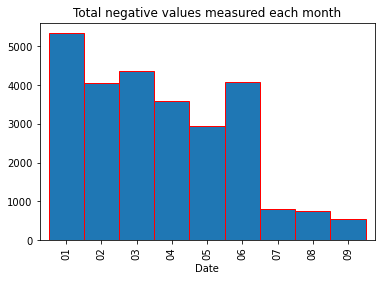

In [22]:
(
    pm1.loc[pm1['Sample.Value'] < 0, ['Sample.Value', 'Date']] # 
    .groupby(pm1['Date'].dt.strftime('%m'))['Sample.Value']
    .count()
    .plot(kind='bar', width=1, edgecolor = 'red', title = 'Total negative values measured each month')
)

Next we can check what has the PM2.5 value pattern in a specific state. We can check for New York which has state code 36. For this, we will take the measurements from the monitors which were available both in 1999 and 2012 as well as have a reasonable amount of measurements to help us determine the pattern.

To do this, first we will extract the common monitors in 1999 and 2012 dataset. A monitor in a state can reside in a county and will have a unique Site ID. So to get all the unique monitors, we will have to get all the unique `County.Code` and `Site.ID` combinations for `State.Code = 36`.

In [23]:
site0 = pm0.loc[pm0['State.Code'] == 36,['County.Code','Site.ID']].drop_duplicates()
site1 = pm1.loc[pm1['State.Code'] == 36,['County.Code','Site.ID']].drop_duplicates()

In [24]:
site0.head()

,County.Code,Site.ID
65876,1,5
65998,1,12
66055,5,73
66074,5,80
66135,5,83


In [25]:
site1.head()

,County.Code,Site.ID
835336,1,5
835411,1,12
835431,5,80
835462,5,133
835493,13,11


In [26]:
# Combining County.Code and Site.ID to create a new variable which is unique for each monitor
site0 = site0['County.Code'].astype(str) + '.' + site0['Site.ID'].astype(str) # astype(str) converts all the values in column to string 

In [27]:
# Combining County.Code and Site.ID to create a new variable which is unique for each monitor
site1 = site1['County.Code'].astype(str) + '.' + site1['Site.ID'].astype(str)

In [28]:
print(site0.head())
print('\n')
print(site1.head())

65876     1.5
65998    1.12
66055    5.73
66074    5.80
66135    5.83
dtype: object


835336      1.5
835411     1.12
835431     5.80
835462    5.133
835493    13.11
dtype: object


In [29]:
commonSites = pd.Series(np.intersect1d(site0.values, site1.values))

In [30]:
commonSites

0       1.12
1        1.5
2      101.3
3      13.11
4       29.5
5       31.3
6       5.80
7    63.2008
8    67.1015
9      85.55
dtype: object

The `commonSites` variable contains all the sites that are common to both 1999 and 2012 dataset. Let's check how many measurements are present for each site.

First we will create a new column in our dataframe objects `County.Site` whose value will be `County.Code` and `Site.ID` separated by `.`

In [31]:
# Since the datatype of Count.Code and Site.ID in pm0 and pm1 is object, we will convert it to string
# To do that, we will use the function .astype({'column_name1':datatype, 'column_name1':datatype}) which will convert the datatype of the columns passed to the datatype passed

pm0 = pm0.astype({'County.Code': str, 'Site.ID': str})
pm1 = pm1.astype({'County.Code': str, 'Site.ID': str})

In [32]:
# Now our County.Code and Site.ID columns are of type string, we can combine those to form a new column called County.Site
# County.Site is the combination of County.Code and Site.ID separated by `.`

pm0['County.Site'] = pm0['County.Code'] + '.' + pm0['Site.ID']
pm0 = pm0.astype({'County.Site': str})
pm1['County.Site'] = pm1['County.Code'] + '.' + pm1['Site.ID']
pm1 = pm1.astype({'County.Site': str})

In [33]:
pm0['County.Site']

3          27.1
4          27.1
5          27.1
6          27.1
7          27.1
          ...  
117406    10.12
117407    10.12
117408    10.12
117417    10.12
117420    10.12
Name: County.Site, Length: 104204, dtype: object

In [34]:
pm1['County.Site']

0           3.10
1           3.10
2           3.10
3           3.10
4           3.10
           ...  
1304282    127.3
1304283    127.3
1304284    127.3
1304285    127.3
1304286    127.3
Name: County.Site, Length: 1231154, dtype: object

Now we will store the data of monitors common to both 1999 and 2012 data set for New Yoork State in a separate variable

In [35]:
pm0_newyork = pm0.loc[(pm0['State.Code'] == 36) & (pm0['County.Site'].isin(commonSites))]
pm0_newyork

,#.RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,...,Qualifier.-.4,Qualifier.-.5,Qualifier.-.6,Qualifier.-.7,Qualifier.-.8,Qualifier.-.9,Qualifier.-.10,Alternate.Method.Detectable.Limit,Uncertainty\n,County.Site
65876,RD,I,36,1,5,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
65877,RD,I,36,1,5,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
65878,RD,I,36,1,5,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
65879,RD,I,36,1,5,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
65881,RD,I,36,1,5,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68406,RD,I,36,101,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.3
68407,RD,I,36,101,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.3
68408,RD,I,36,101,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.3
68409,RD,I,36,101,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.3


In [36]:
pm1_newyork = pm1.loc[(pm1['State.Code'] == 36) & (pm1['County.Site'].isin(commonSites))]
pm1_newyork

,#.RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,...,Qualifier.-.4,Qualifier.-.5,Qualifier.-.6,Qualifier.-.7,Qualifier.-.8,Qualifier.-.9,Qualifier.-.10,Alternate.Method.Detectable.Limit,Uncertainty\n,County.Site
835336,RD,I,36,1,5,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
835337,RD,I,36,1,5,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
835338,RD,I,36,1,5,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
835339,RD,I,36,1,5,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
835340,RD,I,36,1,5,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835967,RD,I,36,101,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.3
835969,RD,I,36,101,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.3
835970,RD,I,36,101,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.3
835971,RD,I,36,101,3,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.3


In [37]:
pm0_newyork['County.Site'].value_counts()

101.3      108
31.3       104
63.2008     92
67.1015     84
1.5         54
29.5        48
13.11       40
5.80        34
1.12        28
85.55        5
Name: County.Site, dtype: int64

In [38]:
pm1_newyork['County.Site'].value_counts()

1.5        60
29.5       31
101.3      30
5.80       30
13.11      27
67.1015    26
85.55      25
63.2008    25
1.12       17
31.3       12
Name: County.Site, dtype: int64

We can choose County.Site `63.2008` since it contains a high number of observations. We will plot the PM2.5 `Sample.Value` for both 1999 and 2012 for the same County.Site.

In [47]:
pm0_sub = pm0.loc[(pm0['State.Code'] == 36) & (pm0['County.Code'] == "63") & (pm0['Site.ID']== "2008")]
pm0_sub

,#.RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,...,Qualifier.-.4,Qualifier.-.5,Qualifier.-.6,Qualifier.-.7,Qualifier.-.8,Qualifier.-.9,Qualifier.-.10,Alternate.Method.Detectable.Limit,Uncertainty\n,County.Site
67583,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67584,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67585,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67586,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67589,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67698,RD,I,36,63,2008,88101,2,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67699,RD,I,36,63,2008,88101,2,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67700,RD,I,36,63,2008,88101,2,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67701,RD,I,36,63,2008,88101,2,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008


In [48]:
pm1_sub = pm1.loc[(pm1['State.Code'] == 36) & (pm1['County.Code'] == "63") & (pm1['Site.ID']== "2008")]
pm1_sub

,#.RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,...,Qualifier.-.4,Qualifier.-.5,Qualifier.-.6,Qualifier.-.7,Qualifier.-.8,Qualifier.-.9,Qualifier.-.10,Alternate.Method.Detectable.Limit,Uncertainty\n,County.Site
835728,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
835729,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
835730,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
835732,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
835733,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
835734,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
835737,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
835739,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
835740,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
835741,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008


In [138]:
pm1_sub['Date'].astype('datetime64[ns]')

835728   2012-01-01
835729   2012-01-04
835730   2012-01-07
835732   2012-01-13
835733   2012-01-16
835734   2012-01-19
835737   2012-01-28
835739   2012-02-03
835740   2012-02-06
835741   2012-02-09
835742   2012-02-12
835743   2012-02-15
835744   2012-02-18
835745   2012-02-21
835746   2012-02-24
835747   2012-02-27
835748   2012-03-01
835749   2012-03-04
835750   2012-03-07
835751   2012-03-10
835752   2012-03-13
835753   2012-03-16
835754   2012-03-19
835755   2012-03-22
835757   2012-03-28
Name: Date, dtype: datetime64[ns]

In [143]:
df = pm0_sub.sort_values('Date', ascending=True)
df

,#.RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,...,Qualifier.-.4,Qualifier.-.5,Qualifier.-.6,Qualifier.-.7,Qualifier.-.8,Qualifier.-.9,Qualifier.-.10,Alternate.Method.Detectable.Limit,Uncertainty\n,County.Site
67583,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67644,RD,I,36,63,2008,88101,2,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67584,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67645,RD,I,36,63,2008,88101,2,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67585,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67700,RD,I,36,63,2008,88101,2,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67639,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67701,RD,I,36,63,2008,88101,2,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008
67640,RD,I,36,63,2008,88101,1,7,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.2008


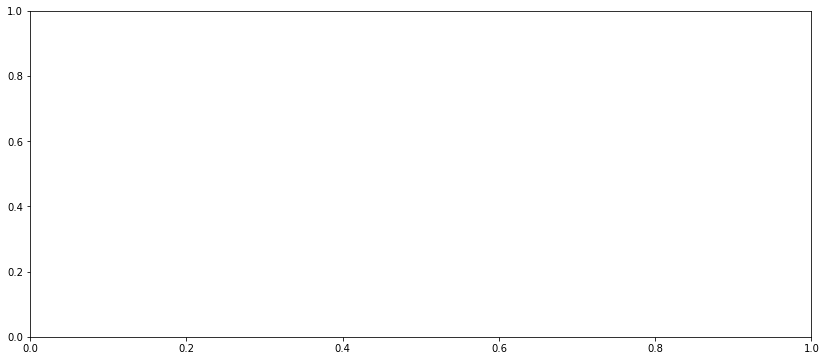

In [148]:
fig1, ax1 = plt.subplots(figsize=(14,6))

In [146]:
ax1.plot(df['Date'], df['Sample.Value'])
fig1.show()

In [149]:
df.plot.scatter('Date','Sample.Value', ax=ax1)

In [151]:
fig1.show()

![separator2](https://i.imgur.com/4gX5WFr.png)